In [1]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import calendar
from scipy import stats
from scipy.stats import pearsonr

In [2]:
# Load the dataframe
df=pd.read_csv ("data/0201X.csv",sep=';')
df.drop('Id', axis=1,inplace=True)
df.head()

,Fecha,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4
0,2013-05-07,23.8,11:00,15.9,03:50,19.8,21.0,19:50,10.0,16:20,0.0,0.0,0.0,0.0,0.0
1,2013-05-08,22.0,13:00,16.1,06:10,19.1,18.0,13:30,9.0,12:10,0.0,0.0,0.0,0.0,0.0
2,2013-05-09,21.7,13:30,16.7,05:10,19.2,16.0,13:40,8.0,14:50,0.0,0.0,0.0,0.0,0.0
3,2013-05-10,19.9,16:40,16.2,22:40,18.1,27.0,12:20,13.0,12:20,0.4,0.0,0.4,0.0,0.0
4,2013-05-11,20.4,14:30,15.0,06:00,17.7,28.0,12:30,14.0,12:00,0.6,0.0,0.6,0.0,0.0


In [3]:
df.columns

Index(['Fecha', 'Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha',
       'Vmax', 'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   3211 non-null   object 
 1   Tmax    2561 non-null   float64
 2   HTmax   2561 non-null   object 
 3   Tmin    2561 non-null   float64
 4   HTmin   2561 non-null   object 
 5   Tmed    2561 non-null   float64
 6   Racha   2559 non-null   float64
 7   HRacha  2559 non-null   object 
 8   Vmax    2559 non-null   float64
 9   HVmax   2559 non-null   object 
 10  TPrec   2580 non-null   float64
 11  Prec1   2693 non-null   float64
 12  Prec2   2671 non-null   float64
 13  Prec3   2662 non-null   float64
 14  Prec4   2646 non-null   float64
dtypes: float64(10), object(5)
memory usage: 376.4+ KB


In [5]:
df['year']=pd.DatetimeIndex(df['Fecha']).year
df['month']=pd.DatetimeIndex(df['Fecha']).month


In [6]:
# Checking for null values
print(df.isnull().sum())

Fecha       0
Tmax      650
HTmax     650
Tmin      650
HTmin     650
Tmed      650
Racha     652
HRacha    652
Vmax      652
HVmax     652
TPrec     631
Prec1     518
Prec2     540
Prec3     549
Prec4     565
year        0
month       0
dtype: int64


In [7]:
df[['Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha','HRacha', 'Vmax', 'HVmax']]=df[['Tmax', 
 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha','HRacha', 'Vmax', 'HVmax']].fillna(method='ffill')

In [8]:
df[['Prec1', 'Prec2', 'Prec3', 'Prec4']]=df[['Prec1', 'Prec2', 'Prec3', 'Prec4']].fillna(0)

In [9]:
df['TPrec']=df['Prec1']+df['Prec2']+df['Prec3']+df['Prec4']

In [10]:
# Checking for null values
print(df.isnull().sum())

Fecha     0
Tmax      0
HTmax     0
Tmin      0
HTmin     0
Tmed      0
Racha     0
HRacha    0
Vmax      0
HVmax     0
TPrec     0
Prec1     0
Prec2     0
Prec3     0
Prec4     0
year      0
month     0
dtype: int64


In [11]:
#target 1-rain, 0-no rain
df['Rain_today']=df['TPrec'].apply(lambda x: 1 if x >0 else 0)
df['Rain_tomorrow']=0
df['Rain_tomorrow'][0:-1]=df['Rain_today'][1:]

<ipython-input-11-997790e6cc4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain_tomorrow'][0:-1]=df['Rain_today'][1:]


In [12]:
df.columns

Index(['Fecha', 'Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha',
       'Vmax', 'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4', 'year',
       'month', 'Rain_today', 'Rain_tomorrow'],
      dtype='object')

# Data Analysis


In [13]:
# rain-day amount
print('max', df[df['year']<2022].groupby('year').sum()['Rain_today'].max())
print('medium', df[df['year']<2022].groupby('year').sum()['Rain_today'].mean())
print('min', df[df['year']<2022].groupby('year').sum()['Rain_today'].min())

max 97
medium 66.33333333333333
min 36


In [14]:
df_mean= df.groupby('month').mean().reset_index()
df_mean.sort_values('month', inplace=True)

In [15]:
df_mean

,month,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,year,Rain_today,Rain_tomorrow
0,1,14.694982,8.417204,11.556989,28.623656,13.290323,0.974910,0.313978,0.337634,0.098925,0.224373,2018.000000,0.136201,0.150538
1,2,16.083004,9.248617,12.669565,30.300395,14.581028,0.756522,0.219763,0.147826,0.144664,0.244269,2018.003953,0.142292,0.130435
2,3,17.643265,9.872653,13.752245,29.869388,14.461224,1.284898,0.325714,0.328163,0.192653,0.438367,2017.469388,0.253061,0.261224
3,4,19.131092,12.035294,15.579832,30.983193,15.113445,1.428571,0.431933,0.465546,0.315126,0.215966,2017.529412,0.252101,0.247899
4,5,21.917949,14.624176,18.270330,30.307692,14.820513,1.137729,0.216850,0.561172,0.128205,0.231502,2017.087912,0.227106,0.223443
5,6,25.562963,18.199259,21.883333,29.244444,14.392593,0.341481,0.053333,0.134815,0.107407,0.045926,2017.000000,0.133333,0.129630
6,7,27.993525,20.711871,24.346043,29.485612,14.388489,0.478417,0.148921,0.162590,0.014388,0.152518,2016.989209,0.205036,0.212230
7,8,27.982796,20.925806,24.448387,29.544803,14.362007,0.665950,0.126882,0.130466,0.165591,0.243011,2017.000000,0.207885,0.207885
8,9,25.760223,18.780297,22.267658,28.747212,13.550186,1.533086,0.536059,0.147212,0.586617,0.263197,2017.011152,0.215613,0.211896
9,10,22.500000,15.811111,19.154480,26.566308,12.508961,1.713262,0.404301,0.407168,0.344086,0.557706,2017.000000,0.175627,0.175627


In [16]:
df_mean_year= df.groupby('year').sum().reset_index()
df_mean_year

,year,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,month,Rain_today,Rain_tomorrow
0,2013,5532.2,4081.5,4807.1,5947.0,2885.0,249.0,76.8,57.6,46.0,68.6,2041,36,36
1,2014,7615.8,5418.1,6518.4,9285.0,4506.0,495.6,74.8,142.4,98.8,179.6,2365,72,72
2,2015,7809.3,5394.8,6601.5,8712.0,4209.0,222.2,72.8,34.4,67.8,47.2,2382,51,51
3,2016,7797.4,5583.3,6692.5,10029.0,4865.0,392.0,52.8,126.8,85.8,126.6,2384,85,85
4,2017,7793.5,5450.9,6624.1,9591.0,4662.0,369.0,93.0,62.6,85.8,127.6,2380,80,80
5,2018,7967.4,5683.4,6829.3,9780.0,4757.0,617.6,190.2,240.4,85.8,101.2,2382,97,97
6,2019,7236.3,2672.7,4940.9,9975.0,4872.0,130.6,14.8,42.0,53.6,20.2,2382,46,46
7,2020,7696.0,5370.8,6531.0,9885.0,4831.0,445.4,159.8,109.6,83.4,92.6,2368,67,67
8,2021,7742.3,5515.3,6631.5,16280.0,7405.0,289.4,74.6,78.2,87.4,49.2,2382,63,63
9,2022,921.5,495.7,709.0,2714.0,1239.0,10.0,4.8,5.0,0.2,0.0,87,4,4


In [17]:
#Temperature vs precipitation

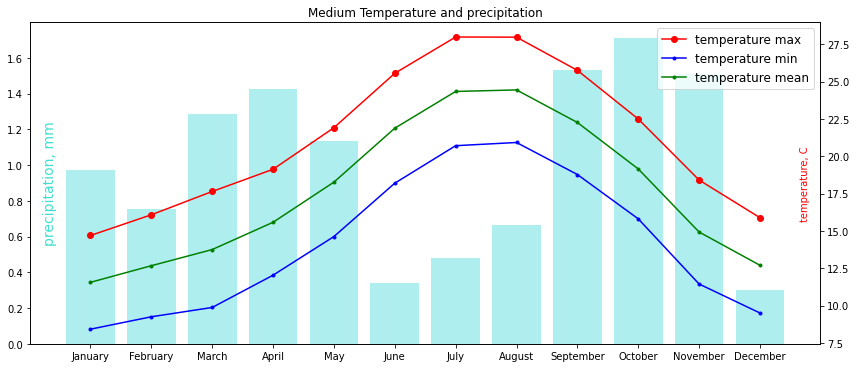

In [18]:
fig, ax  = plt.subplots(figsize = (12,5))

month = df_mean['month']
month_label=[calendar.month_name[m] for m in range(1,13)]
precipitation = df_mean['TPrec']
temp_max=df_mean['Tmax']
temp_min=df_mean['Tmin']
temp_med=df_mean['Tmed']

ax.bar(month, precipitation, color = 'paleturquoise', width=0.8)
ax.set_ylabel('precipitation, mm', color = 'turquoise', fontsize = 14,labelpad=-50)
#ax.grid()
#ax.set_xticklabels(mm)

ax2 = ax.twinx()
plot_temp = ax2.plot(month, temp_max, color = 'red', label = 'temperature max',marker='o',markersize=6)
ax2.set_ylabel('temperature, C', color = 'red', fontsize = 10,loc='center',labelpad=-50)

plot_temp2 = ax2.plot(month, temp_min, color = 'blue', label = 'temperature min',marker='o',markersize=3)
plot_temp3 = ax2.plot(month, temp_med, color = 'green', label = 'temperature mean',marker='o',markersize=3)


totalPlot = plot_temp + plot_temp2+plot_temp3
labels = [p.get_label() for p in totalPlot]
ax.legend(totalPlot, labels, fontsize = 'large', loc='upper right')
plt.xticks(month, month_label)
fig.tight_layout()
plt.savefig('data/Temperature vs precipitation1.png')
plt.title("Medium Temperature and precipitation") 
plt.show()


In [19]:
#Precipitation amount .
#The precipitation diagram for Barcelona shows how many days per month certain precipitation amounts are reached.


- <2 mm
- 2-5 mm
- 5-10 mm
- 10-20 mm
- 20-50 mm
- 50-100 mm

In [20]:
pr_group={'<2 mm': np.arange(2),
          '2-5 mm': np.arange(2,5),
          '5-10 mm': np.arange(5,10),
          '10-20 mm': np.arange(10,20),
          '20-50 mm': np.arange(20,50),
          '50-100 mm': np.arange(50,100)
     }
def get_pr_group(x):
    for i in pr_group.keys():
        if x//1 in pr_group[i]:
            group=i
    return group        

df['pr_group']=df['TPrec'].apply(lambda x: get_pr_group(x))

In [21]:
df_prec=pd.DataFrame()
df_prec[['year','month','pr_group','days']]= df[['year','month','pr_group','Tmax']].groupby(['year','month','pr_group']).count().reset_index()
df_prec=df_prec.groupby(['month','pr_group'])['days'].agg(lambda x:x.value_counts().index[0]).reset_index()
df_prec.sort_values('month', inplace=True)

In [22]:
#add 0 data for grafics
data = {'month': [12,2,6,7,8,11,12], 
            'pr_group':['20-50 mm','50-100 mm','50-100 mm','50-100 mm','50-100 mm','50-100 mm','50-100 mm'], 
            'days':[0,0,0,0,0,0,0]}
#append row to the dataframe
df_data = pd.DataFrame(data)
df_prec =pd.concat([df_prec,df_data],ignore_index=True)
df_prec

,month,pr_group,days
0,1,10-20 mm,1
1,1,2-5 mm,1
2,1,20-50 mm,1
3,1,5-10 mm,1
4,1,50-100 mm,1
...,...,...,...
67,6,50-100 mm,0
68,7,50-100 mm,0
69,8,50-100 mm,0
70,11,50-100 mm,0


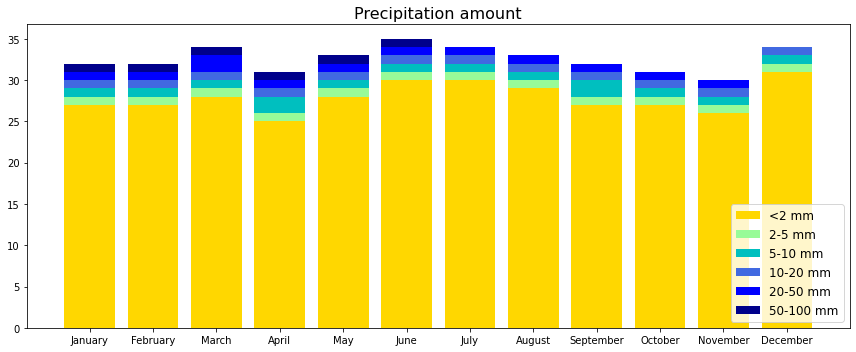

In [23]:
fig, ax  = plt.subplots(figsize = (12,5))
col=['gold','palegreen','c','royalblue','blue','darkblue']
month = np.arange(1,13)
month_label=[calendar.month_name[m] for m in range(1,13)]

c=0
prev=np.zeros(12)

for k in pr_group.keys():
    #month= df_prec[df_prec['pr_group']==k]['month']
    days = df_prec[df_prec['pr_group']==k]['days']
    ax.bar(month, days, bottom=prev, color = [col[c]], width=0.8)
    prev=prev+days.array
    c=c+1

labels = []
ax.legend( pr_group.keys(), fontsize = 'large', loc='lower right')
    
plt.xticks(month, month_label)
plt.title("Precipitation amount", fontsize = 16) 
fig.tight_layout()
plt.savefig('data/Precipitation amount.png')
plt.show()




In [24]:
# correlation con Scipy
# ==============================================================================
def get_correlation(data1,data2,label):
    print('Correlation ',label)
    r, p = stats.pearsonr(data1, data2)
    print(f"Correlación Pearson: r={r}, p-value={p}")

    r, p = stats.spearmanr(data1, data2)
    print(f"Correlación Spearman: r={r}, p-value={p}")

    r, p = stats.kendalltau(data1, data2)
    print(f"Correlación Pearson: r={r}, p-value={p}")
    print('')

get_correlation(df['Tmin'],df['TPrec'], 'Temperature minimum vs precipitacion')
print('')

Correlation  Temperature minimum vs precipitacion
Correlación Pearson: r=-0.017879733855568392, p-value=0.31112996804848336
Correlación Spearman: r=0.02531976642437591, p-value=0.15144866308620464
Correlación Pearson: r=0.019564129116047036, p-value=0.1588362908606552




In [25]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df.corr(method='pearson')
corr_matrix

,Tmax,Tmin,Tmed,Racha,Vmax,TPrec,Prec1,Prec2,Prec3,Prec4,year,month,Rain_today,Rain_tomorrow
Tmax,1.000000,0.876189,0.965606,0.073371,0.129997,-0.082532,-0.023365,-0.068014,-0.055699,-0.051637,-0.097159,0.264498,-0.062614,-0.013750
Tmin,0.876189,1.000000,0.971330,0.059019,0.077868,-0.017880,0.006913,-0.029217,-0.005866,-0.013949,-0.182608,0.259157,0.025265,0.049170
Tmed,0.965606,0.971330,1.000000,0.068377,0.106499,-0.050473,-0.007762,-0.049389,-0.030754,-0.033129,-0.146419,0.270088,-0.017413,0.019668
Racha,0.073371,0.059019,0.068377,1.000000,0.937953,0.092120,0.073715,0.046214,0.041388,0.055703,0.421452,-0.128972,0.083140,0.077748
Vmax,0.129997,0.077868,0.106499,0.937953,1.000000,0.041196,0.061782,0.013532,0.000828,0.016522,0.382115,-0.144798,0.032778,0.049874
TPrec,-0.082532,-0.017880,-0.050473,0.092120,0.041196,1.000000,0.578476,0.607907,0.579678,0.619122,-0.017137,0.004298,0.420482,0.169603
Prec1,-0.023365,0.006913,-0.007762,0.073715,0.061782,0.578476,1.000000,0.138698,0.084327,0.081373,0.004767,-0.008910,0.235122,0.022011
Prec2,-0.068014,-0.029217,-0.049389,0.046214,0.013532,0.607907,0.138698,1.000000,0.127062,0.124872,-0.004738,-0.012029,0.262277,0.080662
Prec3,-0.055699,-0.005866,-0.030754,0.041388,0.000828,0.579678,0.084327,0.127062,1.000000,0.302822,-0.005562,0.033574,0.253225,0.142354
Prec4,-0.051637,-0.013949,-0.033129,0.055703,0.016522,0.619122,0.081373,0.124872,0.302822,1.000000,-0.036317,0.004037,0.253856,0.173626


In [26]:
k = 500
_sample = df.sample(k).reset_index(drop=True)
_sample.head()

,Fecha,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4,year,month,Rain_today,Rain_tomorrow,pr_group
0,2021-10-29,21.9,15:20,15.7,02:10,18.8,46.0,14:20,21.0,13:00,8.8,0.0,0.0,0.0,8.8,2021,10,1,1,5-10 mm
1,2020-05-28,23.9,17:00,18.7,06:20,21.3,18.0,19:00,8.0,00:50,0.0,0.0,0.0,0.0,0.0,2020,5,0,0,<2 mm
2,2020-01-27,15.7,14:00,9.5,05:30,12.6,32.0,14:40,17.0,13:30,0.0,0.0,0.0,0.0,0.0,2020,1,0,0,<2 mm
3,2021-05-21,21.3,15:10,16.0,05:20,18.6,46.0,14:20,21.0,13:00,0.0,0.0,0.0,0.0,0.0,2021,5,0,0,<2 mm
4,2018-10-30,22.1,14:00,17.6,23:50,19.9,23.0,13:20,11.0,00:10,0.0,0.0,0.0,0.0,0.0,2018,10,0,0,<2 mm


In [27]:
stats.ttest_ind(df["TPrec"],_sample["TPrec"])

Ttest_indResult(statistic=-0.6356309867511608, pvalue=0.5250561826018554)

# Machine learning

In [28]:
df['gr_tmax']=np.gradient(df['Tmax'])
df['gr_tmin']=np.gradient(df['Tmin'])
df['gr_tmed']=np.gradient(df['Tmed'])

In [29]:
df.columns

Index(['Fecha', 'Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha',
       'Vmax', 'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4', 'year',
       'month', 'Rain_today', 'Rain_tomorrow', 'pr_group', 'gr_tmax',
       'gr_tmin', 'gr_tmed'],
      dtype='object')

In [30]:
df1=df[['Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha',
       'Vmax', 'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4', 'year',
       'month', 'Rain_today', 'Rain_tomorrow', 'pr_group', 'gr_tmax',
       'gr_tmin', 'gr_tmed']]

In [31]:
for col in ['HTmax','HTmin','HRacha','HVmax']:
    df1[col]=df1[col].apply(lambda x: x.replace(':',''))
df1

<ipython-input-31-aa343611b011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].apply(lambda x: x.replace(':',''))


,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,...,Prec3,Prec4,year,month,Rain_today,Rain_tomorrow,pr_group,gr_tmax,gr_tmin,gr_tmed
0,23.8,1100,15.9,0350,19.8,21.0,1950,10.0,1620,0.0,...,0.0,0.0,2013,5,0,0,<2 mm,-1.80,0.20,-0.70
1,22.0,1300,16.1,0610,19.1,18.0,1330,9.0,1210,0.0,...,0.0,0.0,2013,5,0,0,<2 mm,-1.05,0.40,-0.30
2,21.7,1330,16.7,0510,19.2,16.0,1340,8.0,1450,0.0,...,0.0,0.0,2013,5,0,1,<2 mm,-1.05,0.05,-0.50
3,19.9,1640,16.2,2240,18.1,27.0,1220,13.0,1220,0.4,...,0.0,0.0,2013,5,1,1,<2 mm,-0.65,-0.85,-0.75
4,20.4,1430,15.0,0600,17.7,28.0,1230,14.0,1200,0.6,...,0.0,0.0,2013,5,1,0,<2 mm,-0.15,-0.25,-0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,17.0,1320,11.0,0750,14.0,46.0,1420,21.0,1300,0.0,...,0.0,0.0,2022,2,0,0,<2 mm,-1.15,0.30,-0.45
3207,14.9,1300,11.1,0340,13.0,46.0,1420,21.0,1300,0.0,...,0.0,0.0,2022,2,0,1,<2 mm,-2.10,-0.75,-1.40
3208,12.8,0000,9.5,0700,11.2,46.0,1420,21.0,1300,2.6,...,0.0,0.0,2022,2,1,0,2-5 mm,-0.10,-1.60,-0.85
3209,14.7,1500,7.9,0740,11.3,46.0,1420,21.0,1300,0.0,...,0.0,0.0,2022,2,0,0,<2 mm,1.45,1.00,1.20


In [32]:
df1.columns

Index(['Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha', 'Vmax',
       'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4', 'year', 'month',
       'Rain_today', 'Rain_tomorrow', 'pr_group', 'gr_tmax', 'gr_tmin',
       'gr_tmed'],
      dtype='object')

In [33]:
df1['pr_group'].unique()

array(['<2 mm', '10-20 mm', '2-5 mm', '20-50 mm', '5-10 mm', '50-100 mm'],
      dtype=object)

In [34]:
#encoding pr_group
#Data Transforming
le = preprocessing.LabelEncoder()
df1['pr_group'] = le.fit_transform(df1['pr_group'])
df1.head()


<ipython-input-34-feb7568eb73d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pr_group'] = le.fit_transform(df1['pr_group'])


,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,...,Prec3,Prec4,year,month,Rain_today,Rain_tomorrow,pr_group,gr_tmax,gr_tmin,gr_tmed
0,23.8,1100,15.9,0350,19.8,21.0,1950,10.0,1620,0.0,...,0.0,0.0,2013,5,0,0,5,-1.80,0.20,-0.70
1,22.0,1300,16.1,0610,19.1,18.0,1330,9.0,1210,0.0,...,0.0,0.0,2013,5,0,0,5,-1.05,0.40,-0.30
2,21.7,1330,16.7,0510,19.2,16.0,1340,8.0,1450,0.0,...,0.0,0.0,2013,5,0,1,5,-1.05,0.05,-0.50
3,19.9,1640,16.2,2240,18.1,27.0,1220,13.0,1220,0.4,...,0.0,0.0,2013,5,1,1,5,-0.65,-0.85,-0.75
4,20.4,1430,15.0,0600,17.7,28.0,1230,14.0,1200,0.6,...,0.0,0.0,2013,5,1,0,5,-0.15,-0.25,-0.20


In [35]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df1)
df1 = pd.DataFrame(scaler.transform(df1), index=df1.index, columns=df1.columns)
df1.head()

,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,...,Prec3,Prec4,year,month,Rain_today,Rain_tomorrow,pr_group,gr_tmax,gr_tmin,gr_tmed
0,0.643098,0.466299,0.577075,0.148368,0.622642,0.287879,0.825883,0.310345,0.685398,0.000000,...,0.0,0.0,0.0,0.363636,0.0,0.0,1.0,0.342723,0.500000,0.420118
1,0.582492,0.551081,0.584980,0.258584,0.596226,0.242424,0.561941,0.275862,0.510856,0.000000,...,0.0,0.0,0.0,0.363636,0.0,0.0,1.0,0.413146,0.522727,0.467456
2,0.572391,0.563798,0.608696,0.216193,0.600000,0.212121,0.566198,0.241379,0.613027,0.000000,...,0.0,0.0,0.0,0.363636,0.0,1.0,1.0,0.413146,0.482955,0.443787
3,0.511785,0.695210,0.588933,0.949555,0.558491,0.378788,0.515113,0.413793,0.515113,0.004338,...,0.0,0.0,0.0,0.363636,1.0,1.0,1.0,0.450704,0.380682,0.414201
4,0.528620,0.606189,0.541502,0.254345,0.543396,0.393939,0.519370,0.448276,0.506599,0.006508,...,0.0,0.0,0.0,0.363636,1.0,0.0,1.0,0.497653,0.448864,0.479290


In [36]:
#Using SelectKBest to get the top features!
from sklearn.feature_selection import SelectKBest, chi2
X = df1.loc[:,df1.columns!='Rain_tomorrow']
y = df1[['Rain_tomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['HTmin', 'Racha', 'TPrec', 'Prec2', 'Prec3', 'Prec4', 'Rain_today',
       'pr_group', 'gr_tmax', 'gr_tmed'],
      dtype='object')


In [37]:
#The important features are put in a data frame
X = df1[['HTmin', 'Racha', 'TPrec', 'Prec2', 'Prec3', 'Prec4', 'Rain_today',
       'pr_group', 'gr_tmax', 'gr_tmed']]
y = df1[['Rain_tomorrow']]


# Logistic Regression

In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#Data Splicing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_logreg = LogisticRegression(random_state=0)
#Building the model using the training data set
clf_logreg.fit(X_train,y_train.values.ravel())
 
#Evaluating the model using testing data set
y_pred_lr = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred_lr)
 
#Printing the accuracy and the time taken by the classifier
print('Accuracy using Logistic Regression:',score)
print("ROC AUC Logistic Regression - ", roc_auc_score(y_test, y_pred_lr))

Accuracy using Logistic Regression: 0.821917808219178
ROC AUC Logistic Regression -  0.5613472250876832


# Random Forest Classifier

In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
 
#Calculating the accuracy 
#Data Splicing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
#Building the model using the training data set
clf_rf.fit(X_train,y_train.values.ravel())
 
#Evaluating the model using testing data set
y_pred_rf = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred_rf)
 
#Printing the accuracy and the time taken by the classifier
print('Accuracy using Random Forest Classifier:',score)
print("ROC AUC Random Forest Classifier: ", roc_auc_score(y_test, y_pred_rf))


Accuracy using Random Forest Classifier: 0.8293897882938979
ROC AUC Random Forest Classifier:  0.5594278033794162


# K Nearest Neighbor(KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [41]:
y_pred_KN = classifier.predict(X_test)
kn_9_accuracy=accuracy_score(y_test, y_pred_KN)
print('Accuracy using K Nearest Neighbor(KNN):',kn_9_accuracy)
print("ROC AUC K Nearest Neighbor(KNN) - ", roc_auc_score(y_test, y_pred_KN))


Accuracy using K Nearest Neighbor(KNN): 0.800747198007472
ROC AUC K Nearest Neighbor(KNN) -  0.5669769181017059


# Clustering

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df_sample=df1[['Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha', 'Vmax',
       'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4', 'year', 'month',
       'Rain_today', 'pr_group', 'gr_tmax', 'gr_tmin',
       'gr_tmed']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sample)  
kmeans = KMeans(
       init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42)

In [58]:
kmeans_kwargs = {
      "init": "random",
       "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

In [59]:
kmeansResults1 = {}
  # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_sample)
    score = silhouette_score(scaled_features, kmeans.labels_)
    kmeansResults1[k]=[kmeans.inertia_, score]

In [60]:
kmeans = KMeans(
       init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42)

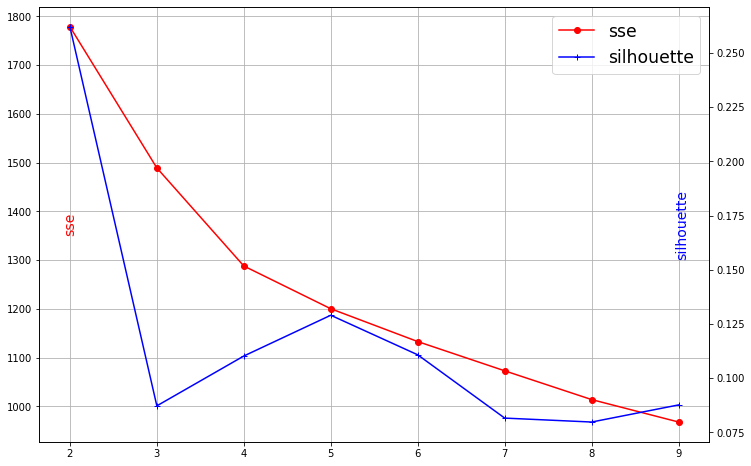

In [61]:
fig, ax  = plt.subplots(figsize = (12,8))

ssePlot = ax.plot(kmeansResults1.keys(), np.array(list(kmeansResults1.values()))[:,0], marker = 'o', color = 'red', label = 'sse')
ax.set_ylabel('sse', color = 'red', fontsize = 14,labelpad=-70)
ax.grid()

ax2 = ax.twinx()
silPlot = ax2.plot(kmeansResults1.keys(), np.array(list(kmeansResults1.values()))[:,1], marker = '+', color = 'blue', label = 'silhouette')
ax2.set_ylabel('silhouette', color = 'blue', fontsize = 14, labelpad=-70)


totalPlot = ssePlot + silPlot
labels = [p.get_label() for p in totalPlot]
ax.legend(totalPlot, labels, fontsize = 'xx-large')
plt.savefig('data/Silhouette Coefficient and sse-preciptacion.png')

In [62]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_sample)
data_scaled = pd.DataFrame(data_scaled, columns=df_sample.columns)
data_scaled.head()

,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,...,Prec2,Prec3,Prec4,year,month,Rain_today,pr_group,gr_tmax,gr_tmin,gr_tmed
0,0.307251,0.222782,0.275707,0.070885,0.297477,0.137539,0.394579,0.148272,0.327460,0.000000,...,0.000000,0.0,0.0,0.0,0.173733,0.000000,0.477767,0.163742,0.238883,0.200718
1,0.294434,0.278557,0.295692,0.130707,0.301377,0.122539,0.284046,0.139441,0.258224,0.000000,...,0.000000,0.0,0.0,0.0,0.183809,0.000000,0.505474,0.208834,0.264225,0.236286
2,0.287801,0.283480,0.306055,0.108703,0.301683,0.106655,0.284687,0.121367,0.308233,0.000000,...,0.000000,0.0,0.0,0.0,0.182838,0.000000,0.502804,0.207731,0.242832,0.223138
3,0.212453,0.288597,0.244479,0.394182,0.231842,0.157243,0.213835,0.171775,0.213835,0.001801,...,0.002134,0.0,0.0,0.0,0.150954,0.415123,0.415123,0.187098,0.158030,0.171944
4,0.236552,0.271264,0.242317,0.113817,0.243165,0.176284,0.232413,0.200599,0.226698,0.002912,...,0.003451,0.0,0.0,0.0,0.162724,0.447490,0.447490,0.222695,0.200862,0.214478


In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 2, 2], dtype=int64)

In [66]:
from sklearn.decomposition import PCA

In [75]:
df_sample=df1[['Tmax', 'HTmax', 'Tmin', 'HTmin', 'Tmed', 'Racha', 'HRacha', 'Vmax',
       'HVmax', 'TPrec', 'Prec1', 'Prec2', 'Prec3', 'Prec4', 'year', 'month',
       'Rain_today', 'pr_group', 'gr_tmax', 'gr_tmin',
       'gr_tmed']]
pca = PCA(n_components=4)
principal_components = pca.fit_transform(df_sample)
principal_df = pd.DataFrame(data = principal_components, columns = ['pc_1', 'pc_2','pc_3', 'pc_4'])
                                                                    
#pc_3', 'pc_4', 'pc_5', 'pc_6','pc_7', 'pc_8', 'pc_9', 'pc_10', 'pc_11'])
principal_df

,pc_1,pc_2,pc_3,pc_4
0,-0.247207,-0.164009,0.175964,-0.503943
1,-0.215883,-0.104028,0.325987,-0.415647
2,-0.226902,-0.125399,0.318934,-0.452655
3,0.835299,-0.216270,0.245163,-0.321368
4,0.707088,-0.173527,0.218760,-0.396382
...,...,...,...,...
3206,-0.095472,0.602759,-0.511612,0.147893
3207,-0.104085,0.643471,-0.484942,0.150695
3208,1.138926,0.574993,-0.416378,0.149596
3209,-0.098670,0.745300,-0.449406,0.159614


In [76]:
#explain variants radio
pca.explained_variance_ratio_

array([0.24312237, 0.20495158, 0.13787661, 0.11259347])